In [1]:


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files





from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab


import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')



Libraries imported.


In [2]:
url = 'https://raw.githubusercontent.com/Daylen-Mackey/dog-house-training/master/Luna%20Tracking.csv'
sheet = pd.read_csv(url)
sheet.head(82)

,Date,Day #,# Pees,# Poops,Notes
0,2019-05-30,1.0,1.0,0.0,NaN
1,2019-05-31,2.0,2.0,1.0,NaN
2,2019-06-01,3.0,1.0,1.0,NaN
3,2019-06-02,4.0,1.0,2.0,NaN
4,2019-06-03,5.0,2.0,1.0,NaN
5,2019-06-04,6.0,2.0,1.0,NaN
6,2019-06-05,7.0,4.0,0.0,NaN
7,2019-06-06,8.0,5.0,1.0,NaN
8,2019-06-07,9.0,1.0,1.0,NaN
9,2019-06-08,10.0,3.0,1.0,NaN


In [3]:
df = sheet[:80]

In [4]:
df.tail()

,Date,Day #,# Pees,# Poops,Notes
75,2019-08-13,76.0,2.0,1.0,NaN
76,2019-08-14,77.0,1.0,1.0,NaN
77,2019-08-15,78.0,0.0,0.0,NaN
78,2019-08-16,79.0,0.0,0.0,NaN
79,2019-08-17,80.0,0.0,0.0,NaN


# Cleaning the Data

In [6]:
df.columns = ["Date","DayNo", "Pees","Poops", "Notes"]
df.head()


,Date,DayNo,Pees,Poops,Notes
0,2019-05-30,1.0,1.0,0.0,NaN
1,2019-05-31,2.0,2.0,1.0,NaN
2,2019-06-01,3.0,1.0,1.0,NaN
3,2019-06-02,4.0,1.0,2.0,NaN
4,2019-06-03,5.0,2.0,1.0,NaN


In [7]:
df.Pees.replace(np.nan,0,inplace = True)
df.Poops.replace(np.nan,0,inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
# df.set_index('DayNo', inplace = True)
# df.drop('Date', axis = 1, inplace = True)
df

,Date,DayNo,Pees,Poops,Notes
0,2019-05-30,1.0,1.0,0.0,NaN
1,2019-05-31,2.0,2.0,1.0,NaN
2,2019-06-01,3.0,1.0,1.0,NaN
3,2019-06-02,4.0,1.0,2.0,NaN
4,2019-06-03,5.0,2.0,1.0,NaN
5,2019-06-04,6.0,2.0,1.0,NaN
6,2019-06-05,7.0,4.0,0.0,NaN
7,2019-06-06,8.0,5.0,1.0,NaN
8,2019-06-07,9.0,1.0,1.0,NaN
9,2019-06-08,10.0,3.0,1.0,NaN


In [11]:
peeFrequency = df.groupby('Pees')['Pees']

for key, item in peeFrequency:
    print(peeFrequency.get_group(key), "\n\n")


17    0.0
25    0.0
27    0.0
39    0.0
40    0.0
53    0.0
54    0.0
56    0.0
58    0.0
66    0.0
77    0.0
78    0.0
79    0.0
Name: Pees, dtype: float64 


0     1.0
2     1.0
3     1.0
8     1.0
15    1.0
16    1.0
18    1.0
21    1.0
22    1.0
26    1.0
29    1.0
32    1.0
33    1.0
38    1.0
42    1.0
46    1.0
47    1.0
49    1.0
51    1.0
52    1.0
55    1.0
57    1.0
60    1.0
65    1.0
67    1.0
68    1.0
69    1.0
71    1.0
73    1.0
74    1.0
76    1.0
Name: Pees, dtype: float64 


1     2.0
4     2.0
5     2.0
13    2.0
14    2.0
19    2.0
20    2.0
28    2.0
30    2.0
34    2.0
35    2.0
36    2.0
41    2.0
43    2.0
45    2.0
48    2.0
59    2.0
61    2.0
62    2.0
63    2.0
64    2.0
75    2.0
Name: Pees, dtype: float64 


9     3.0
23    3.0
24    3.0
31    3.0
37    3.0
44    3.0
72    3.0
Name: Pees, dtype: float64 


6     4.0
11    4.0
Name: Pees, dtype: float64 


7     5.0
50    5.0
Name: Pees, dtype: float64 


70    7.0
Name: Pees, dtype: float64 


10    8.0


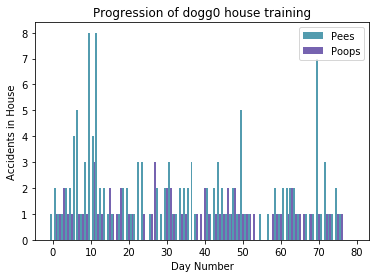

In [10]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 1
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)

    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't
        # overlap with previously drawn ones
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
groupedbarplot(x_data = df.index
               , y_data_list = [df.Pees, df.Poops]
               , y_data_names = ['Pees', 'Poops']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day Number'
               , y_label = 'Accidents in House'
               , title = 'Progression of dogg0 house training')

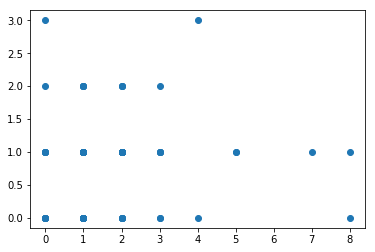

In [38]:
plt.plot( 'Pees', 'Poops', data=df, linestyle='none', marker='o')
plt.show()

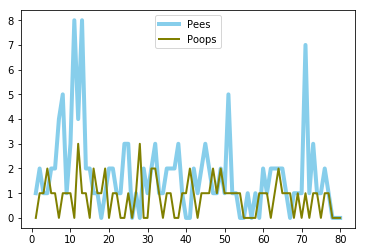

In [52]:
plt.plot( 'DayNo', 'Pees', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'DayNo', 'Poops', data=df, marker='', color='olive', linewidth=2)
plt.legend()